In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
filename = '2018-12-16_16-48-31-.log'

In [43]:
df = pd.read_csv(filename, sep='|', header=1, skiprows=1)

In [44]:
df

,timestamp,epoch,batches_processed,mean loss,segmentation accuracy,box IOU ground,box IOU 3d,box accuracy,seg_loss
0,"2018-12-16 16:48:33,984 -",0,3,267.811432,0.528060,0.004633,0.002617,0.0,0.693544
1,"2018-12-16 16:48:36,007 -",0,6,255.048859,0.504948,0.006025,0.001445,0.0,0.728425
2,"2018-12-16 16:48:38,041 -",1,3,276.048645,0.488664,0.002881,0.001466,0.0,0.713339
3,"2018-12-16 16:48:40,074 -",1,6,246.103333,0.562134,0.003934,0.002249,0.0,0.675803
4,"2018-12-16 16:48:42,040 -",2,3,257.576477,0.531177,0.003520,0.001933,0.0,0.719829
5,"2018-12-16 16:48:44,012 -",2,6,255.975433,0.521021,0.006571,0.002794,0.0,0.721908
6,"2018-12-16 16:48:46,069 -",3,3,287.857391,0.548893,0.005523,0.002877,0.0,0.706520
7,"2018-12-16 16:48:48,099 -",3,6,237.312302,0.535596,0.024758,0.008833,0.0,0.698677
8,"2018-12-16 16:48:50,114 -",4,3,266.295227,0.555688,0.004270,0.003222,0.0,0.724233
9,"2018-12-16 16:48:52,091 -",4,6,268.588074,0.557723,0.013016,0.004718,0.0,0.693248


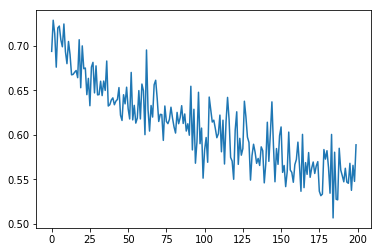

In [45]:
df[' seg_loss'].plot()

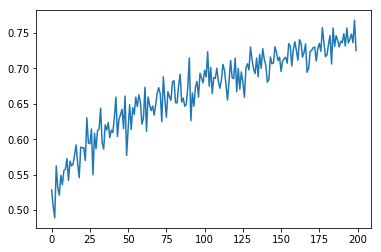

In [46]:
df[' segmentation accuracy '].plot()

In [28]:
import torch
x = torch.Tensor(5,4,3)

In [29]:
y = x.view(-1, 3, 4)
z = x.permute(0, 2, 1)

In [30]:
y.size(), z.size()


(torch.Size([5, 3, 4]), torch.Size([5, 3, 4]))

In [36]:
import numpy as np
np.sum(y.numpy() == z.numpy())

21

In [50]:
x = torch.Tensor(5,4,7)
y = torch.Tensor(5,4,1)

In [48]:
torch.max(x)

tensor(306006127511569556475379382747136.)

In [49]:
x.size()

torch.Size([5, 4, 3])

In [51]:
torch.cat((x,y), dim=-1).size()

torch.Size([5, 4, 8])